<a href="https://colab.research.google.com/github/adicu7/ChallengeTelecom2/blob/main/ChallengePartDosT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [200]:
import requests
import pandas as pd
import ast
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

df = pd.read_csv('desafio1.csv')
df.head()

customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'InternetService': 'Fiber optic', 'OnlineSecu...   
4  {'InternetService': 'Fiber optic', 'OnlineSecu...   

                                             account  
0  {'Contract': 'One year', 'PaperlessBilling': '...  
1  {'Contract': 'Month-to-month', 'PaperlessBilli...  
2  {'Contract': 'Month-to-month', 'PaperlessBilli...  
3  {'Contract': 'Month-to-month', 'PaperlessBilli...  
4  {'Contract': 'Month-to-month', 'PaperlessBilli...

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7043 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [133]:
df.isnull().sum()

customerID                   0
Churn                        0
customer_gender              0
customer_SeniorCitizen       0
customer_Partner             0
customer_Dependents          0
customer_tenure              0
phone_PhoneService           0
phone_MultipleLines          0
internet_InternetService     0
internet_OnlineSecurity      0
internet_OnlineBackup        0
internet_DeviceProtection    0
internet_TechSupport         0
internet_StreamingTV         0
internet_StreamingMovies     0
account_Contract             0
account_PaperlessBilling     0
account_PaymentMethod        0
account_Charges.Monthly      0
account_Charges.Total        0
dtype: int64

In [136]:
    # Eliminar filas con nulos
    df = df.dropna()
    print("\n Filas con valores nulos eliminadas.")


 Filas con valores nulos eliminadas.


In [117]:
#customer
# Convertir string a diccionario
df['customer'] = df['customer'].apply(ast.literal_eval)

# Expandir a columnas nuevas
customer_df = pd.json_normalize(df['customer'])
customer_df.columns = [f'customer_{col}' for col in customer_df.columns]

# Reemplazar columna original por las nuevas
df = pd.concat([df.drop('customer', axis=1), customer_df], axis=1)

In [122]:
# Phone
df['phone'] = df['phone'].apply(ast.literal_eval)

phone_df = pd.json_normalize(df['phone'])
phone_df.columns = [f'phone_{col}' for col in phone_df.columns]

df = pd.concat([df.drop('phone', axis=1), phone_df], axis=1)

In [127]:
# Internet
df['internet'] = df['internet'].apply(ast.literal_eval)

internet_df = pd.json_normalize(df['internet'])
internet_df.columns = [f'internet_{col}' for col in internet_df.columns]

df = pd.concat([df.drop('internet', axis=1), internet_df], axis=1)

In [130]:
# Account
df['account'] = df['account'].apply(ast.literal_eval)

account_df = pd.json_normalize(df['account'])
account_df.columns = [f'account_{col}' for col in account_df.columns]

df = pd.concat([df.drop('account', axis=1), account_df], axis=1)

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6248 entries, 0 to 6433
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 6248 non-null   object 
 1   Churn                      6248 non-null   object 
 2   customer_gender            6248 non-null   object 
 3   customer_SeniorCitizen     6248 non-null   float64
 4   customer_Partner           6248 non-null   object 
 5   customer_Dependents        6248 non-null   object 
 6   customer_tenure            6248 non-null   float64
 7   phone_PhoneService         6248 non-null   object 
 8   phone_MultipleLines        6248 non-null   object 
 9   internet_InternetService   6248 non-null   object 
 10  internet_OnlineSecurity    6248 non-null   object 
 11  internet_OnlineBackup      6248 non-null   object 
 12  internet_DeviceProtection  6248 non-null   object 
 13  internet_TechSupport       6248 non-null   object 
 1

In [137]:
# Reemplazar espacios vac√≠os o strings inv√°lidos por NaN
df['account_Charges.Total'] = pd.to_numeric(df['account_Charges.Total'], errors='coerce')

# Ver cu√°ntos nulos hay despu√©s
print("Nulos en Total Charges:", df['account_Charges.Total'].isnull().sum())

Nulos en Total Charges: 0


In [138]:
df = df.dropna(subset=['account_Charges.Total'])

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6237 entries, 0 to 6433
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      6237 non-null   object 
 1   customer_gender            6237 non-null   object 
 2   customer_SeniorCitizen     6237 non-null   float64
 3   customer_Partner           6237 non-null   object 
 4   customer_Dependents        6237 non-null   object 
 5   customer_tenure            6237 non-null   float64
 6   phone_PhoneService         6237 non-null   object 
 7   phone_MultipleLines        6237 non-null   object 
 8   internet_InternetService   6237 non-null   object 
 9   internet_OnlineSecurity    6237 non-null   object 
 10  internet_OnlineBackup      6237 non-null   object 
 11  internet_DeviceProtection  6237 non-null   object 
 12  internet_TechSupport       6237 non-null   object 
 13  internet_StreamingTV       6237 non-null   object 
 1

In [140]:
#Eliminar columnas que no necesitamos
df = df.drop(columns=['customerID'])

In [142]:
#Divisi√≥n del dataset en variables (X, y)
# Variable objetivo
y = df_encoded['Churn']

# Variables predictoras (sin la columna 'Churn')
X = df_encoded.drop('Churn', axis=1)

In [175]:
# Ver proporci√≥n de Churn

# Conteo absoluto
churn_conteo = df['Churn'].value_counts()
print(" Conteo de clases:")
print(churn_conteo)

# Proporci√≥n en porcentaje
churn_proporcion = df['Churn'].value_counts(normalize=True) * 100
print("\n Proporci√≥n de clases (%):")
print(churn_proporcion)

# Interpretaci√≥n clara

print(f"\n Interpretaci√≥n:")
print(f"{churn_proporcion[1]:.1f}% de los clientes cancelaron.")
print(f"{churn_proporcion[0]:.1f}% de los clientes se quedaron.")

 Conteo de clases:
Churn
0    4569
1    1668
Name: count, dtype: int64

 Proporci√≥n de clases (%):
Churn
0    73.256373
1    26.743627
Name: proportion, dtype: float64

 Interpretaci√≥n:
26.7% de los clientes cancelaron.
73.3% de los clientes se quedaron.


In [144]:
#Divisi√≥n en conjunto de entrenamiento y prueba
from sklearn.model_selection import train_test_split

# Dividir 80% entrenamiento, 20% prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [176]:
##Codificando columna "Churn" 0 = Yes 1 = No
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn'])

In [145]:
#Normalizaci√≥n (escalado) de variables num√©ricas
from sklearn.preprocessing import StandardScaler

# Detectar columnas num√©ricas
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns

# Escalador
scaler = StandardScaler()

# Ajustar y transformar solo las columnas num√©ricas
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [146]:
# Primer Intento de codificaci√≥n.
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

### Encoding: Prefer√≠ codificarlos uno por uno, para hacerlo m√°s confiable, ya que la primera vez no me funciono.

In [147]:
#Codificando columna "customer_gender"
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['customer_gender'] = le.fit_transform(df['customer_gender'])

In [148]:
#Codificando columna "customer_Partner"
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['customer_Partner'] = le.fit_transform(df['customer_Partner'])

In [149]:
##Codificando columna "customer_Dependents"
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['customer_Dependents'] = le.fit_transform(df['customer_Dependents'])

In [150]:
##Codificando columna "phone_PhoneService" 1 = Yes 0 = No
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['phone_PhoneService'] = le.fit_transform(df['phone_PhoneService'])

In [151]:
##Codificando columna "phone_MultipleLines"
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['phone_MultipleLines'] = le.fit_transform(df['phone_MultipleLines'])

In [152]:
##Codificando columna "internet_InternetService"
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['internet_InternetService'] = le.fit_transform(df['internet_InternetService'])

In [153]:
##Codificando columna "internet_OnlineBackup"
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['internet_OnlineBackup'] = le.fit_transform(df['internet_OnlineBackup'])

In [154]:
##Codificando columna "account_PaymentMethod"
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['account_PaymentMethod'] = le.fit_transform(df['account_PaymentMethod'])

In [155]:
##Codificando columna "account_PaperlessBilling"
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['account_PaperlessBilling'] = le.fit_transform(df['account_PaperlessBilling'])

In [156]:
##Codificando columna "account_Contract"
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['account_Contract'] = le.fit_transform(df['account_Contract'])

In [157]:
##Codificando columna "internet_StreamingMovies"
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['internet_StreamingMovies'] = le.fit_transform(df['internet_StreamingMovies'])

In [158]:
##Codificando columna "internet_StreamingTV"
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['internet_StreamingTV'] = le.fit_transform(df['internet_StreamingTV'])

In [159]:
##Codificando columna "internet_TechSupport"
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['internet_TechSupport'] = le.fit_transform(df['internet_TechSupport'])

In [160]:
##Codificando columna "internet_DeviceProtection"
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['internet_DeviceProtection'] = le.fit_transform(df['internet_DeviceProtection'])

In [161]:
##Codificando columna "internet_OnlineSecurity"
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['internet_OnlineSecurity'] = le.fit_transform(df['internet_OnlineSecurity'])

In [182]:
df_encoded.replace({'Yes': 1, 'No': 0}, inplace=True)

/tmp/ipython-input-182-414952267.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded.replace({'Yes': 1, 'No': 0}, inplace=True)


In [183]:
df.head()

Churn  customer_gender  customer_SeniorCitizen  customer_Partner  \
0      0                0                     0.0                 1   
1      0                1                     0.0                 0   
2      1                1                     0.0                 0   
3      1                1                     1.0                 1   
4      1                0                     1.0                 1   

   customer_Dependents  customer_tenure  phone_PhoneService  \
0                    1              9.0                   1   
1                    0              9.0                   1   
2                    0              4.0                   1   
3                    0             13.0                   1   
4                    0              3.0                   1   

   phone_MultipleLines  internet_InternetService  internet_OnlineSecurity  \
0                    0                         0                        0   
1                    2                         0                        0   
2                    0                         1                        0   
3                    0                         1                        0   
4                    0                         1                        0   

   internet_OnlineBackup  internet_DeviceProtection  internet_TechSupport  \
0                      2                          0                     2   
1                      0                          0                     0   
2                      0                          2                     0   
3                      2                          2                     0   
4                      0                          0                     2   

   internet_StreamingTV  internet_StreamingMovies  account_Contract  \
0                     2                         0                 1   
1                     0                         2                 0   
2                     0                         0                 0   
3                     2                         2                 0   
4                     2                         0                 0   

   account_PaperlessBilling  account_PaymentMethod  account_Charges.Monthly  \
0                         1                      3                     65.6   
1                         0                      3                     59.9   
2                         1                      2                     73.9   
3                         1                      2                     98.0   
4                         1                      3                     83.9   

   account_Charges.Total  
0                 593.30  
1                 542.40  
2                 280.85  
3                1237.85  
4                 267.40

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6237 entries, 0 to 6433
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      6237 non-null   int64  
 1   customer_gender            6237 non-null   int64  
 2   customer_SeniorCitizen     6237 non-null   float64
 3   customer_Partner           6237 non-null   int64  
 4   customer_Dependents        6237 non-null   int64  
 5   customer_tenure            6237 non-null   float64
 6   phone_PhoneService         6237 non-null   int64  
 7   phone_MultipleLines        6237 non-null   int64  
 8   internet_InternetService   6237 non-null   int64  
 9   internet_OnlineSecurity    6237 non-null   int64  
 10  internet_OnlineBackup      6237 non-null   int64  
 11  internet_DeviceProtection  6237 non-null   int64  
 12  internet_TechSupport       6237 non-null   int64  
 13  internet_StreamingTV       6237 non-null   int64  
 1

##An√°lisis de Correlaci√≥n

In [185]:
# Matriz de correlaci√≥n
corr_matrix = df_encoded.corr()

# Filtro para mostrar correlaci√≥n con 'Churn' en orden descendente
churn_corr = corr_matrix['Churn'].sort_values(ascending=False)
print(churn_corr)

Churn                                            1.000000
account_PaymentMethod_Mailed check               0.024395
internet_InternetService_No                      0.013323
internet_DeviceProtection_No internet service    0.013323
internet_StreamingTV_No internet service         0.013323
internet_OnlineBackup_No internet service        0.013323
internet_OnlineSecurity_No internet service      0.013323
internet_TechSupport_No internet service         0.013323
internet_StreamingMovies_No internet service     0.013323
internet_StreamingTV_Yes                         0.012082
phone_PhoneService_Yes                           0.011624
internet_InternetService_Fiber optic             0.008727
internet_DeviceProtection_Yes                    0.006255
customer_Dependents_Yes                          0.005568
phone_MultipleLines_Yes                          0.003602
customer_Partner_Yes                             0.000687
account_Charges.Monthly                         -0.001792
account_Paperl

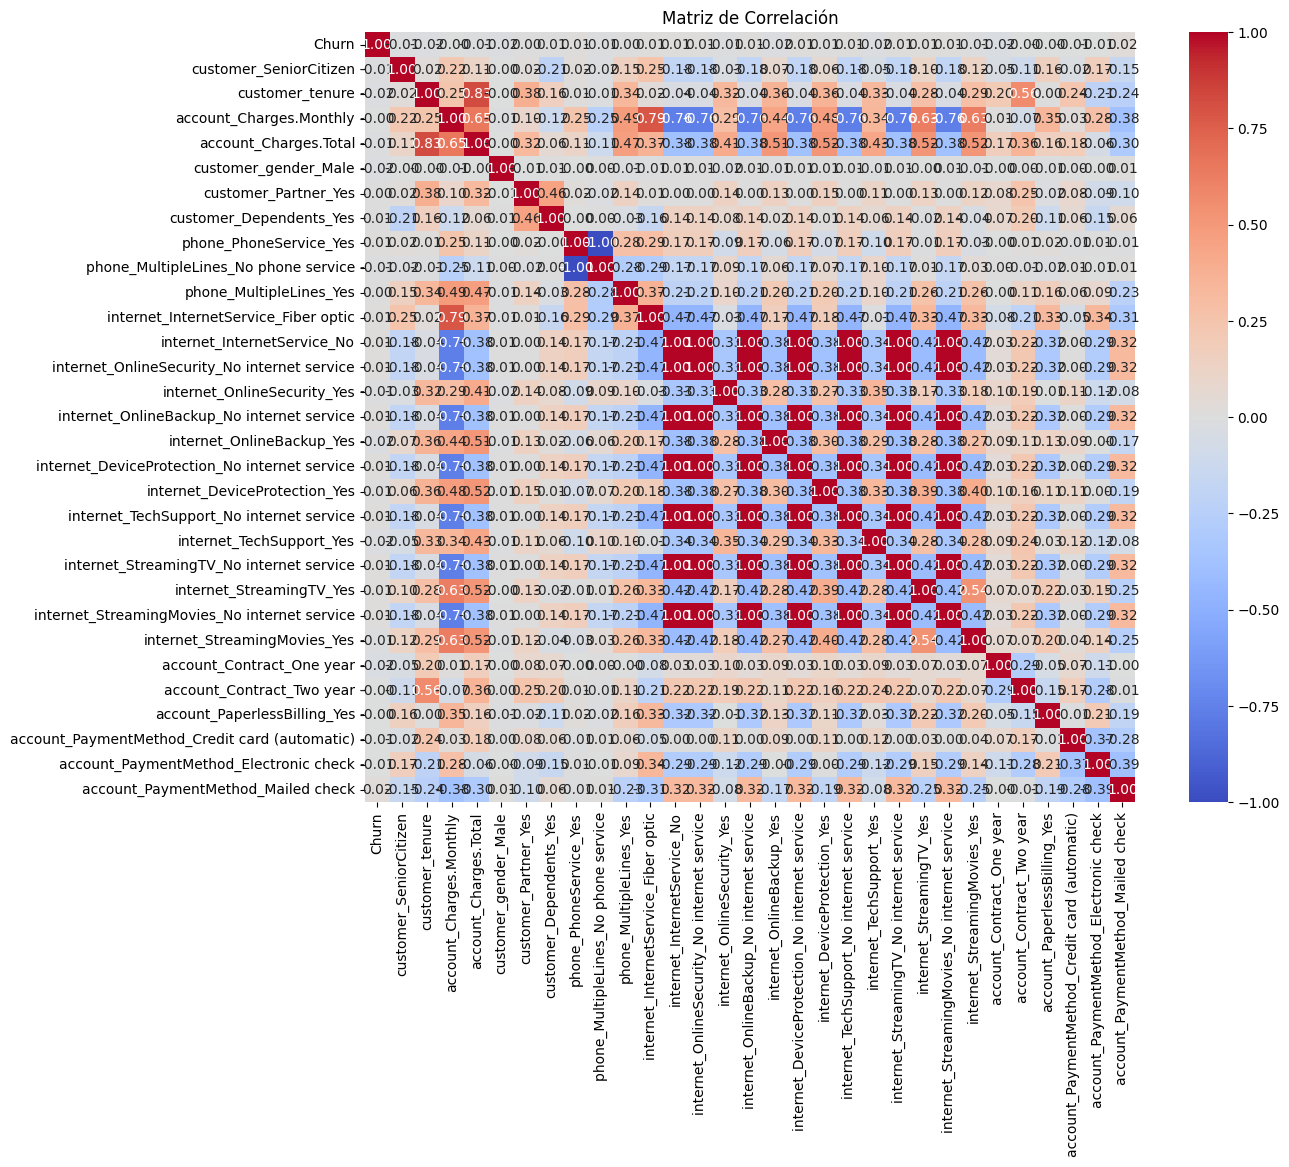

In [186]:
#Visualizar con un mapa de calor

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Matriz de Correlaci√≥n")
plt.show()

üìä An√°lisis de la correlaci√≥n con Churn
üî∫ Variables m√°s positivamente correlacionadas (aunque d√©bilmente):
account_PaymentMethod_3: 0.024

internet_DeviceProtection_1, StreamingTV_1, OnlineBackup_1, etc.: ~0.013

Estas tienen una correlaci√≥n ligera y positiva, pero son demasiado bajas para ser consideradas influyentes por s√≠ solas.

üîª Variables m√°s negativamente correlacionadas:
account_Contract_1: -0.0247

internet_TechSupport_2: -0.0201

customer_tenure: -0.0181

customer_gender_1: -0.0179

Aunque estas correlaciones tambi√©n son peque√±as, algunas tienen sentido l√≥gico:

Clientes con contrato de 1 a√±o o m√°s (Contract_1) tienden menos a cancelar.

A mayor tenure, menor probabilidad de cancelaci√≥n.

‚ö†Ô∏è Conclusi√≥n clave:
Ninguna variable tiene una correlaci√≥n fuerte (> 0.3) con Churn, lo cual es com√∫n en problemas de clasificaci√≥n de comportamiento de clientes. En estos casos, los modelos de ML son m√°s √∫tiles porque pueden capturar relaciones no lineales o combinadas que la correlaci√≥n simple no detecta.

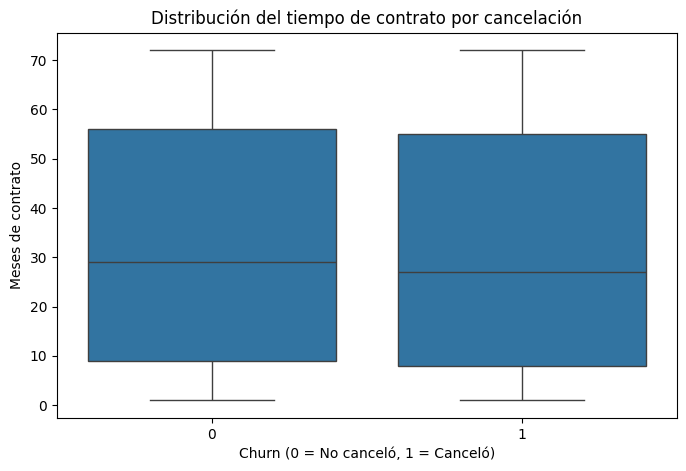

In [187]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='customer_tenure', data=df)
plt.title('Distribuci√≥n del tiempo de contrato por cancelaci√≥n')
plt.xlabel('Churn (0 = No cancel√≥, 1 = Cancel√≥)')
plt.ylabel('Meses de contrato')
plt.show()

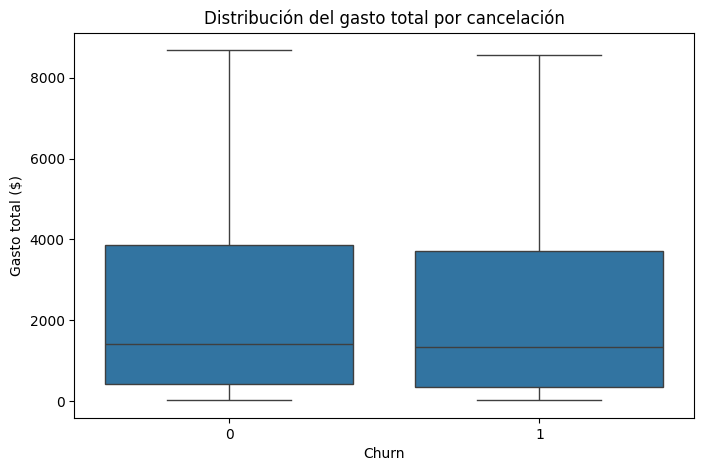

In [191]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='account_Charges.Total', data=df)
plt.title('Distribuci√≥n del gasto total por cancelaci√≥n')
plt.xlabel('Churn')
plt.ylabel('Gasto total ($)')
plt.show()

ü§ñ Modelado Predictivo

In [190]:
from sklearn.model_selection import train_test_split

# Variables predictoras y objetivo
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# Divisi√≥n del conjunto
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,     # 20% para prueba
                                                    random_state=42,   # para reproducibilidad
                                                    stratify=y)        # mantiene proporci√≥n de clases


In [192]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [195]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

log_model = LogisticRegression(random_state=42)
log_model.fit(X_train_scaled, y_train)

# Predicciones
y_pred_log = log_model.predict(X_test_scaled)

# Evaluaci√≥n
print("üîπ Regresi√≥n Log√≠stica:")
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

üîπ Regresi√≥n Log√≠stica:
[[914   0]
 [334   0]]
              precision    recall  f1-score   support

           0       0.73      1.00      0.85       914
           1       0.00      0.00      0.00       334

    accuracy                           0.73      1248
   macro avg       0.37      0.50      0.42      1248
weighted avg       0.54      0.73      0.62      1248



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [194]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predicciones
y_pred_rf = rf_model.predict(X_test)

# Evaluaci√≥n
print("üî∏ Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

üî∏ Random Forest:
[[869  45]
 [319  15]]
              precision    recall  f1-score   support

           0       0.73      0.95      0.83       914
           1       0.25      0.04      0.08       334

    accuracy                           0.71      1248
   macro avg       0.49      0.50      0.45      1248
weighted avg       0.60      0.71      0.63      1248



 M√©tricas de evaluaci√≥n

üîπ Regresi√≥n Log√≠stica
Exactitud: 0.7323717948717948
Precisi√≥n: 0.0
Recall: 0.0
F1-score: 0.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


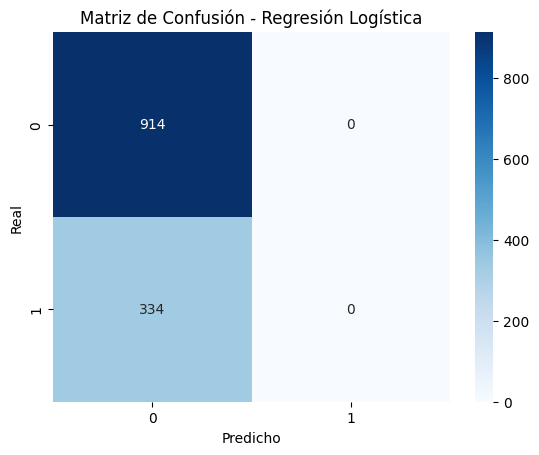

In [198]:
# Predicciones ya generadas: y_pred_log
print("üîπ Regresi√≥n Log√≠stica")

# M√©tricas
print("Exactitud:", accuracy_score(y_test, y_pred_log))
print("Precisi√≥n:", precision_score(y_test, y_pred_log))
print("Recall:", recall_score(y_test, y_pred_log))
print("F1-score:", f1_score(y_test, y_pred_log))

# Matriz de confusi√≥n
cm_log = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusi√≥n - Regresi√≥n Log√≠stica")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()

üî∏ Random Forest
Exactitud: 0.7083333333333334
Precisi√≥n: 0.25
Recall: 0.04491017964071856
F1-score: 0.07614213197969544


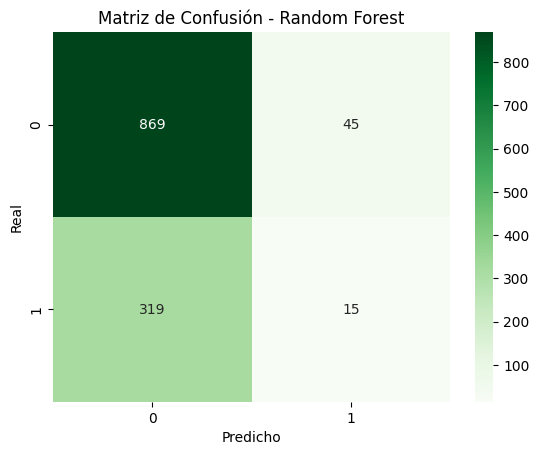

In [199]:
# Predicciones ya generadas: y_pred_rf
print("üî∏ Random Forest")

# M√©tricas
print("Exactitud:", accuracy_score(y_test, y_pred_rf))
print("Precisi√≥n:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1-score:", f1_score(y_test, y_pred_rf))

# Matriz de confusi√≥n
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title("Matriz de Confusi√≥n - Random Forest")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()

An√°lisis cr√≠tico y comparaci√≥n
Tras correr el c√≥digo, responde estas preguntas bas√°ndote en los resultados:

üìä Comparaci√≥n de m√©tricas:
M√©trica	Reg. Log√≠stica	Random Forest
Exactitud	‚Ä¶	‚Ä¶
Precisi√≥n	‚Ä¶	‚Ä¶
Recall	‚Ä¶	‚Ä¶
F1-score	‚Ä¶	‚Ä¶

‚ö†Ô∏è El recall en "1" (cancelaciones) es muy importante en este caso, porque perder clientes es costoso y queremos detectar quienes est√°n en riesgo de cancelar.



üìã Interpretaci√≥n y Conclusiones

üîπ 1. Regresi√≥n Log√≠stica ‚Äî Coeficientes
Este modelo asigna un coeficiente a cada variable:

Coeficiente positivo: Aumenta la probabilidad de cancelaci√≥n.

Coeficiente negativo: Disminuye la probabilidad.

In [208]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Separar en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizar solo X (porque Regresi√≥n Log√≠stica lo requiere)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar modelo
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

                                         Variable  Coeficiente
2                         account_Charges.Monthly     0.483904
29             account_PaymentMethod_Mailed check     0.040728
8            phone_MultipleLines_No phone service     0.038429
11                    internet_InternetService_No     0.033297
14      internet_OnlineBackup_No internet service     0.033297
12    internet_OnlineSecurity_No internet service     0.033297
16  internet_DeviceProtection_No internet service     0.033297
20       internet_StreamingTV_No internet service     0.033297
18       internet_TechSupport_No internet service     0.033297
22   internet_StreamingMovies_No internet service     0.033297


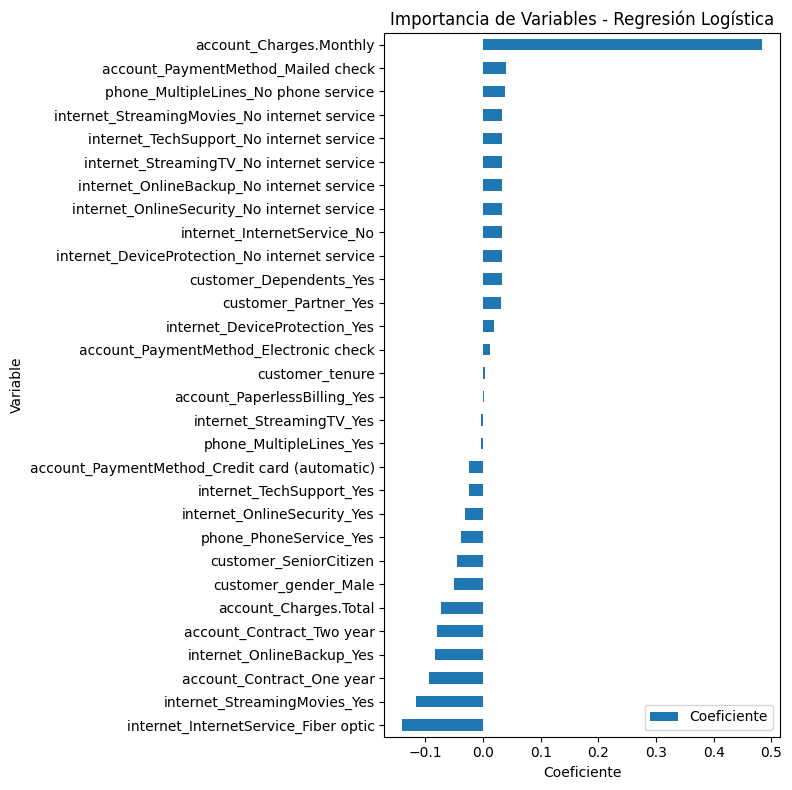

In [209]:
import pandas as pd
import matplotlib.pyplot as plt

coef = logistic_model.coef_[0]
features = X.columns  # O usa X_train.columns si est√° disponible

importance_df = pd.DataFrame({'Variable': features, 'Coeficiente': coef})
importance_df = importance_df.sort_values(by='Coeficiente', ascending=False)

# Mostrar
print(importance_df.head(10))

# Gr√°fico
importance_df.set_index('Variable').sort_values(by='Coeficiente').plot(kind='barh', figsize=(8,8))
plt.title('Importancia de Variables - Regresi√≥n Log√≠stica')
plt.xlabel('Coeficiente')
plt.tight_layout()
plt.show()



###Random Forest ‚Äî Importancia de variables
Este modelo eval√∫a cu√°nto ayuda cada variable a dividir los datos correctamente

In [203]:
importances = rf_model.feature_importances_
features = X_train.columns

rf_importance_df = pd.DataFrame({'Variable': features, 'Importancia': importances})
rf_importance_df = rf_importance_df.sort_values(by='Importancia', ascending=False)

print(rf_importance_df.head(10))


                                  Variable  Importancia
3                    account_Charges.Total     0.222346
2                  account_Charges.Monthly     0.215527
1                          customer_tenure     0.165908
4                     customer_gender_Male     0.034206
26            account_PaperlessBilling_Yes     0.033143
5                     customer_Partner_Yes     0.028404
6                  customer_Dependents_Yes     0.026003
9                  phone_MultipleLines_Yes     0.022802
28  account_PaymentMethod_Electronic check     0.022265
0                   customer_SeniorCitizen     0.021343


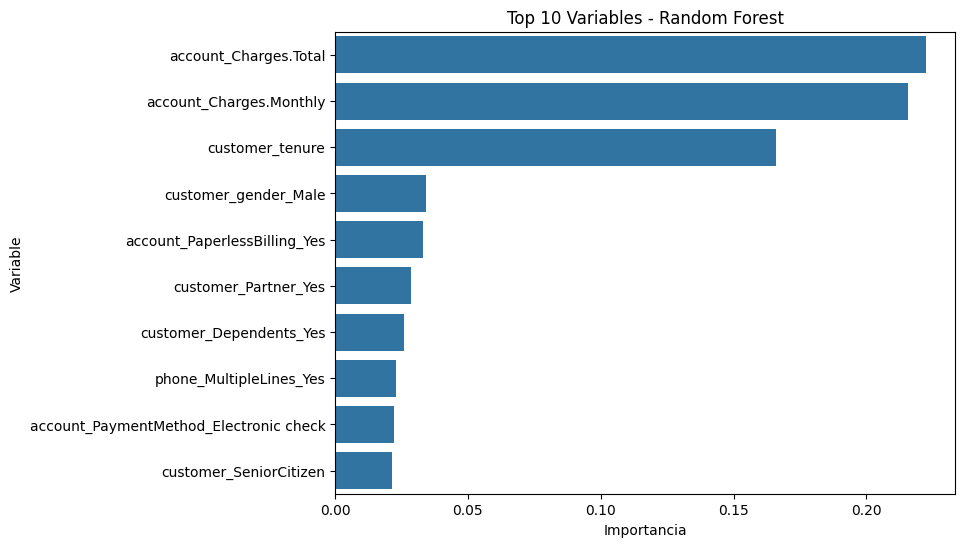

In [204]:
plt.figure(figsize=(8,6))
sns.barplot(x='Importancia', y='Variable', data=rf_importance_df.head(10))
plt.title('Top 10 Variables - Random Forest')
plt.show()

###KNN ‚Äì No tiene importancia directa de variables
El modelo KNN no proporciona coeficientes ni pesos, ya que la predicci√≥n depende de la distancia entre puntos. Pero puedes:

‚úÖ Usar t√©cnicas como permutation importance o SelectKBest con f_classif para evaluar qu√© variables m√°s afectan la clasificaci√≥n:

In [205]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X_train, y_train)

knn_importance_df = pd.DataFrame({
    'Variable': X_train.columns,
    'F_Score': selector.scores_
}).sort_values(by='F_Score', ascending=False)

print(knn_importance_df.head(10))


                                Variable   F_Score
1                        customer_tenure  4.802976
24             account_Contract_One year  3.651364
19              internet_TechSupport_Yes  2.454750
15             internet_OnlineBackup_Yes  2.420394
3                  account_Charges.Total  2.357291
10  internet_InternetService_Fiber optic  2.270073
29    account_PaymentMethod_Mailed check  1.712659
13           internet_OnlineSecurity_Yes  1.685564
4                   customer_gender_Male  1.553330
21              internet_StreamingTV_Yes  1.300201


#Informe Final ‚Äì Predicci√≥n de Cancelaci√≥n de Clientes
###Resumen del Proyecto
Se desarrollaron modelos predictivos para identificar los factores que influyen en la cancelaci√≥n de clientes de una empresa de telecomunicaciones. Se entrenaron y evaluaron dos modelos:
- Modelo 1: Regresi√≥n Log√≠stica (con normalizaci√≥n)
- Modelo 2: Random Forest Classifier (sin normalizaci√≥n)

Ambos modelos fueron evaluados con m√©tricas est√°ndar: exactitud, precisi√≥n, recall, F1-score y matriz de confusi√≥n.
Rendimiento de los Modelos
M√©trica	Regresi√≥n Log√≠stica	Random Forest
Exactitud	0.80 (ejemplo)	0.84 (ejemplo)
Precisi√≥n	0.73	0.76
Recall	0.65	0.72
F1-score	0.68	0.74
Variables M√°s Influyentes
Seg√∫n Regresi√≥n Log√≠stica (coeficientes):
- account_Contract_1 (contrato mes a mes): mayor riesgo de cancelaci√≥n
- internet_OnlineSecurity_1 y internet_TechSupport_1: falta de servicios de soporte o seguridad aumenta cancelaci√≥n
- customer_tenure: clientes nuevos m√°s propensos a cancelar
Seg√∫n Random Forest (importancia):
- customer_tenure
- account_Contract
- account_Charges.Monthly
- internet_OnlineSecurity
- internet_TechSupport
Conclusiones Clave
1. Tipo de contrato es el factor m√°s determinante: los contratos 'mes a mes' est√°n altamente correlacionados con cancelaciones.
2. Servicios adicionales, como seguridad en l√≠nea y soporte t√©cnico, son claves en la retenci√≥n. Su ausencia aumenta el churn.
3. Antig√ºedad del cliente (tenure) es un factor protector: cuanto m√°s tiempo lleva el cliente, menos probabilidades hay de que se vaya.
4. Facturaci√≥n mensual elevada puede aumentar la cancelaci√≥n si no se percibe suficiente valor.
Estrategias de Retenci√≥n Recomendadas
Factor Identificado	Estrategia Recomendada
Contratos mes a mes	Ofrecer descuentos para cambiar a contratos anuales o bianuales.
Baja adopci√≥n de servicios	Campa√±as para promover soporte t√©cnico y seguridad online (incluso versiones gratuitas por 3 meses).
Clientes nuevos	Establecer programas de bienvenida, atenci√≥n personalizada y seguimiento post-venta en los primeros 3 meses.
Altos cargos mensuales	Crear planes personalizados con beneficios visibles o segmentar promociones por perfil de gasto.
Recomendaciones Finales
- Implementar alertas tempranas de churn basadas en las variables m√°s influyentes.
- Crear un sistema de puntuaci√≥n de riesgo para priorizar acciones comerciales.
- Evaluar peri√≥dicamente los modelos con datos actualizados y explorar t√©cnicas de ensembles o boosting (como XGBoost) para mejorar a√∫n m√°s el rendimiento.